# Importing required libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading data file

In [32]:
data=pd.read_csv('heart.csv')
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [34]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

# statistical analysis

In [35]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

# Finding missing values

In [36]:
missing_val=data.isna().sum()
missing_val

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values

# EDA

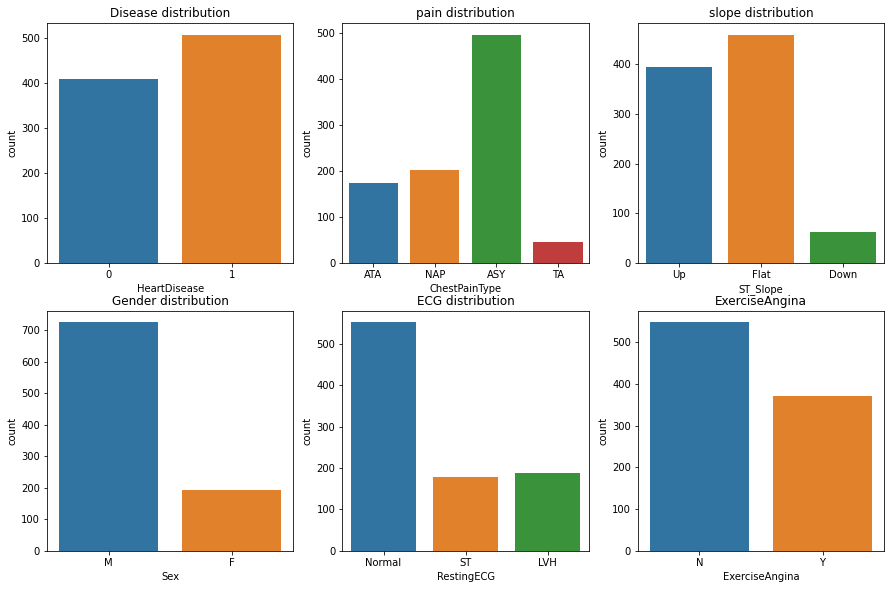

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.countplot('HeartDisease',data = data)
plt.title("Disease distribution")
plt.subplot(3,3,2)
sns.countplot('ChestPainType',data = data)
plt.title("pain distribution")
plt.subplot(3,3,3)
sns.countplot('ST_Slope',data = data)
plt.title("slope distribution")
plt.subplot(3,3,4)
sns.countplot('Sex',data = data)
plt.title("Gender distribution")
plt.subplot(3,3,5)
sns.countplot('RestingECG',data=data)
plt.title("ECG distribution")
plt.subplot(3,3,6)
sns.countplot('ExerciseAngina',data=data)
plt.title("ExerciseAngina")
plt.show()

In [38]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [39]:
cor_data=data.corr()
cor_data

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

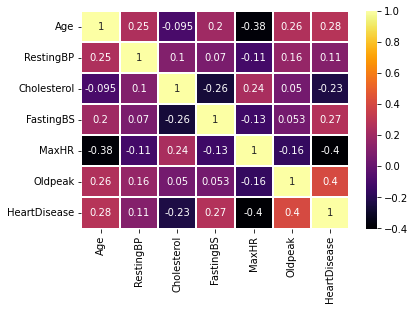

In [40]:
sns.heatmap(cor_data,annot= True,cmap="inferno",linewidth=1.5)
plt.show()

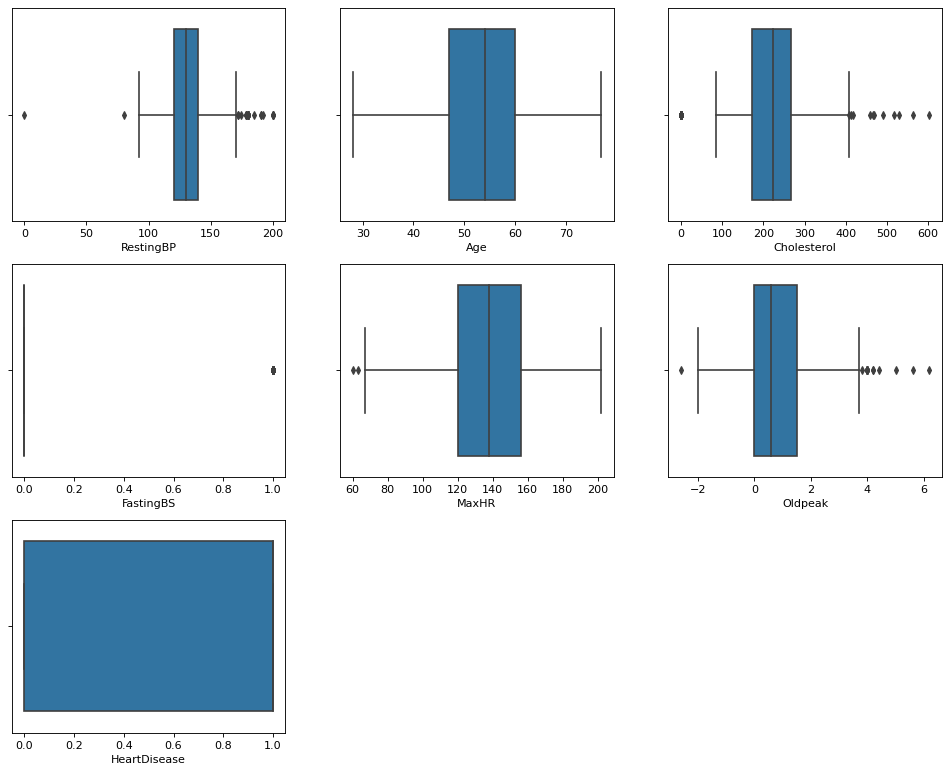

In [41]:
plt.figure(figsize=(15, 12), dpi=80)
plt.subplot(3,3,1)
bp=sns.boxplot(data['RestingBP'])
plt.subplot(3,3,2)
bp=sns.boxplot(data['Age'])
plt.subplot(3,3,3)
bp=sns.boxplot(data['Cholesterol'])
plt.subplot(3,3,4)
bp=sns.boxplot(data['FastingBS'])
plt.subplot(3,3,5)
bp=sns.boxplot(data['MaxHR'])
plt.subplot(3,3,6)
bp=sns.boxplot(data['Oldpeak'])
plt.subplot(3,3,7)
bp=sns.boxplot(data['HeartDisease'])
plt.show()

# data encoding( converting categorical data into numerical data)

In [42]:

data['Sex']=data['Sex'].apply(lambda x : 1 if (x =='M') else(0))
data['ExerciseAngina']=data['ExerciseAngina'].apply(lambda x : 1 if (x =='Y') else(0))
data['ChestPainType']=data['ExerciseAngina'].replace(['ATA'],0)
data['ChestPainType']=data['ExerciseAngina'].replace(['NAP'],1)
data['ChestPainType']=data['ExerciseAngina'].replace(['ASY'],2)
data['ChestPainType']=data['ExerciseAngina'].replace(['TA'],4)
data['ST_Slope']=data['ST_Slope'].replace(['Up'],1)
data['ST_Slope']=data['ST_Slope'].replace(['Flat'],2)
data['ST_Slope']=data['ST_Slope'].replace(['Down'],3)
data['RestingECG']=data['RestingECG'].replace(['Normal'],1)
data['RestingECG']=data['RestingECG'].replace(['LVH'],2)
data['RestingECG']=data['RestingECG'].replace(['ST'],3)

In [43]:
data

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              0        140          289          0           1   
1     49    0              0        160          180          0           1   
2     37    1              0        130          283          0           3   
3     48    0              1        138          214          0           1   
4     54    1              0        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              0        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              1        130          131          0           1   
916   57    0              0        130          236          0           2   
917   38    1              0        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         1             0  
1      156               0      1.0         2             1  
2       98               0      0.0         1             0  
3      108               1      1.5         2             1  
4      122               0      0.0         1             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         2             1  
914    141               0      3.4         2             1  
915    115               1      1.2         2             1  
916    174               0      0.0         2             1  
917    173               0      0.0         1             0  

[918 rows x 12 columns]

# Fitting data on different model and find accuracy of each model

# Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [45]:
# X = feature values, all the columns except the species column
X = data.iloc[:, :-1]
display(X)

# y = target values, only the species column
y = data.iloc[:, -1]
display(y)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              0        140          289          0           1   
1     49    0              0        160          180          0           1   
2     37    1              0        130          283          0           3   
3     48    0              1        138          214          0           1   
4     54    1              0        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              0        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              1        130          131          0           1   
916   57    0              0        130          236          0           2   
917   38    1              0        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0      172               0      0.0         1  
1      156               0      1.0         2  
2       98               0      0.0         1  
3      108               1      1.5         2  
4      122               0      0.0         1  
..     ...             ...      ...       ...  
913    132               0      1.2         2  
914    141               0      3.4         2  
915    115               1      1.2         2  
916    174               0      0.0         2  
917    173               0      0.0         1  

[918 rows x 11 columns]

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train) #Training the model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08770D+02    |proj g|=  5.47800D+03

At iterate   50    f=  2.84994D+02    |proj g|=  2.08930D+01

At iterate  100    f=  2.82571D+02    |proj g|=  3.02764D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(verbose=1)

   12    100    114      1     0     0   3.028D+02   2.826D+02
  F =   282.57068946766890     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [48]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1]

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        78
           1       0.86      0.88      0.87       106

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



# KNN Model

In [49]:
# Training with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(2,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  train_pred=knn.predict(x_train)
  train_score=accuracy_score(train_pred,y_train)
  test_pred= knn.predict(x_test)
  test_score=(round(accuracy_score(test_pred,y_test)*100,2))
  test_accuracy.append(test_score)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  67.39 Value of K:  2
Test Accuracy:  67.39 Value of K:  3
Test Accuracy:  69.02 Value of K:  4
Test Accuracy:  69.02 Value of K:  5
Test Accuracy:  70.65 Value of K:  6
Test Accuracy:  69.57 Value of K:  7
Test Accuracy:  69.02 Value of K:  8
Test Accuracy:  69.02 Value of K:  9


# Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestRegressor


In [51]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [52]:
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [55]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22771739130434784
Mean Squared Error: 0.13478260869565215
Root Mean Squared Error: 0.3671275101319052


# Naive bias Model

In [57]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)


GaussianNB()

In [58]:
#Predicting the Test set results
y_pred = nvclassifier.predict(x_test)
print(y_pred)

[0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1
 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1]


In [59]:
x_test = x_test.reset_index(drop = True)
x_test["pred_species"] = y_pred

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

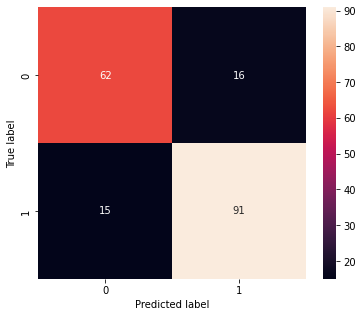

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  153
False predictions 31
**********************************************************************
Accuracy of the Naive Bayes Clasification is 83.15% 
**********************************************************************
